<a href="https://colab.research.google.com/github/jupitershot/Financial-Inclusion-Exploratory-Data-Analysis/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_12_Kennedy_Njoroge_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion Exploratory Data Analysis


## 1 Question Definition


### a) Specifying the Data Analytic Question


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 
The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success


All exploratory data analysis steps are completed. 
1. Data structure understood. 
2. Data successfully cleaned
2. Bivariate and univariate analysis done.
3. Reduction successfully applied on the data

### c) Understanding the context 

1. The dataset is extracted from Kenya, Rwanda, Tanzania, and Uganda  where only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
2. The data was extracted from various Finscope surveys ranging from 2016 to 2018.
3. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design



### e) Data Relevance

## 2. Importing the data

In [0]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Import Dataset
df = pd.read_csv('Financial Dataset.csv')

## 3. Checking the Data

In [0]:
# Number of records
df.shape

(23524, 13)

In [0]:
#View sample dataset to understand structure
df.sample(n=5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
20175,Tanzania,2017,uniqueid_5373,No,Urban,Yes,2.0,32.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
2232,Kenya,2018,uniqueid_2233,No,Rural,Yes,3.0,75.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
15571,Tanzania,2017,uniqueid_769,No,Urban,No,3.0,22.0,Female,Other relative,Single/Never Married,Primary education,Informally employed
6034,Kenya,2018,uniqueid_6035,No,Rural,Yes,4.0,30.0,Female,Spouse,Married/Living together,Primary education,Self employed
7450,Rwanda,2016,uniqueid_1383,No,Rural,No,3.0,67.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [0]:
#Check the structure of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# 
df.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [0]:
#Description
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

### 5.1 Checking Outliers

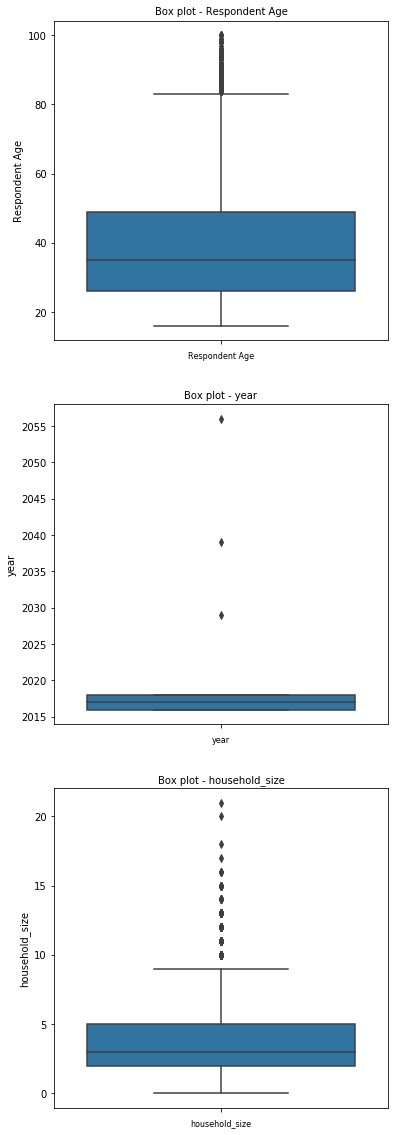

In [0]:
#Outlier: Year, household size and respondent age
col_names = ['Respondent Age', 'year','household_size']

fig, ax = plt.subplots(len(col_names), figsize=(6,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Outlier Notes
1. Age - 2030, 2040, 2055 on boxplot noted - investigate further
2. Respondent age. 3rd quartile is 80 years.  Outliers noted of age above 80 to 100. Check distribution quantities
3. Household size - 10 - 22 noted as outliers. Check distribution quantities.

NOTE: The data cannot be plotted via sns.distplot as there are null values.Error "ValueError: cannot convert float NaN to integer" 
We need to fill the null values for above columns before checking anormalies as below.

### 5.2 Identify and Deal with Missing Data

In [0]:
#Check Null Columns
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

#### a) Age

In [0]:
# Mean of Age column
print(df['Respondent Age'].mean())
print(df['Respondent Age'].median())
print(df['Respondent Age'].mode())

38.804299702000854
35.0
0    30.0
dtype: float64


Mode will be used to fill the null values because:
1. Respondent age has outliers hence mean is not the best fill nulls choice.
2. Mode best for categorical variables.

In [0]:
#Fill null respondent age with median values
df['Respondent Age'] = df['Respondent Age'].fillna(df['Respondent Age'].median())

In [0]:
#Count null
df['Respondent Age'].isnull().sum()

0

#### b) Year

In [0]:
# Mean of Age column
print(df['year'].mean())
print(df['year'].median())
print(df['year'].mode())

2016.9790001700392
2017.0
0    2016
dtype: int64


Mode to be used to fill null values in the year column as:
a) Year has outliers
b) Mode is the most occuring value.

In [0]:
#Fill null respondent age with median values
df['year'] = df['year'].fillna(df['year'].mode())

In [0]:
#Count null
df['year'].isnull().sum()

0

#### c) Household size

In [0]:
# Mean of Age column
print(df['household_size'].mean())
print(df['household_size'].median())
print(df['household_size'].mode())

3.6818181818181817
3.0
0    2.0
dtype: float64


Median will be used to fill the null values. There are outliers hence mean not preferred.

In [0]:
#Fill null respondent age with median values
df['household_size'] = df['household_size'].fillna(df['household_size'].median())

In [0]:
#Count null
df['household_size'].isnull().sum()

0

### 5.3 Checking Anomalies

/home/ken/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


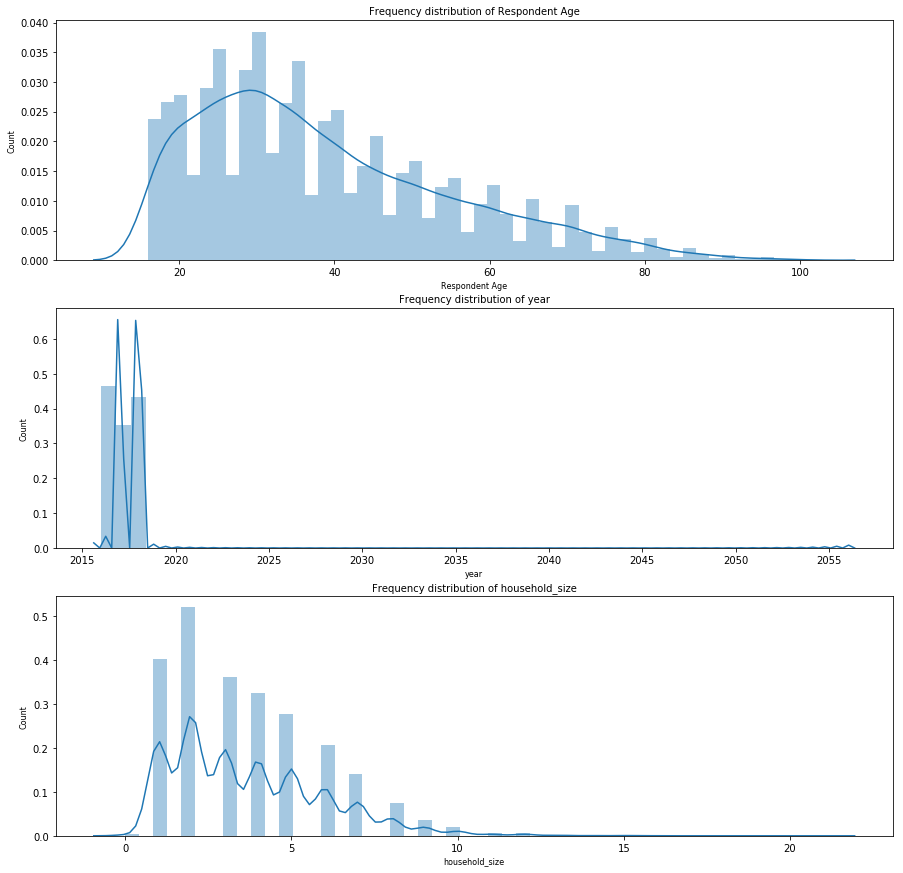

In [0]:
# Checking for Anomalies
col_names = ['Respondent Age','year','household_size']
fig, ax = plt.subplots(len(col_names), figsize=(15,15))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

### 5.4 More data cleaning procedures

Plot distribution of categorical variables

#### a) Country

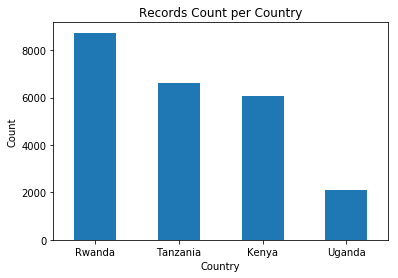

In [0]:
df['country'].value_counts().plot.bar(rot =0)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Records Count per Country")
plt.show()

#### b) Has a Bank account

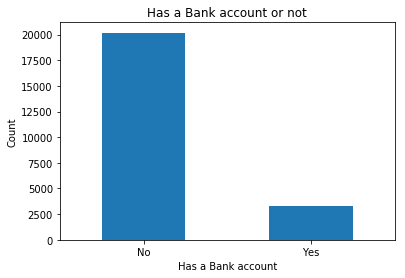

In [0]:
df['Has a Bank account'].value_counts().plot.bar(rot =0)
plt.xlabel("Has a Bank account")
plt.ylabel("Count")
plt.title("Has a Bank account or not")
plt.show()

#### c) Type of Location

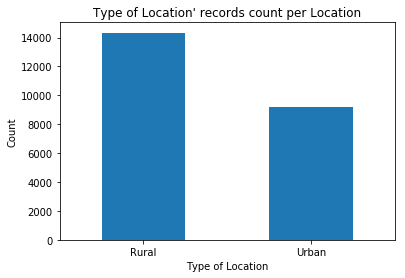

In [0]:
df['Type of Location'].value_counts().plot.bar(rot =0)
plt.xlabel("Type of Location")
plt.ylabel("Count")
plt.title("Type of Location' records count per Location")
plt.show()

#### d) Cell Phone Access

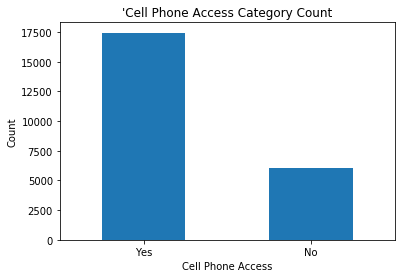

In [0]:
df['Cell Phone Access'].value_counts().plot.bar(rot =0)
plt.xlabel("Cell Phone Access")
plt.ylabel("Count")
plt.title("'Cell Phone Access Category Count")
plt.show()

#### e) Gender of respondent

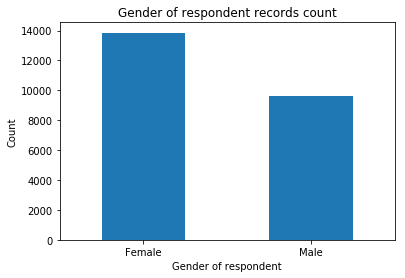

In [0]:
df['gender_of_respondent'].value_counts().plot.bar(rot =0)
plt.xlabel("Gender of respondent")
plt.ylabel("Count")
plt.title("Gender of respondent records count")
plt.show()

#### f) The relationship with head

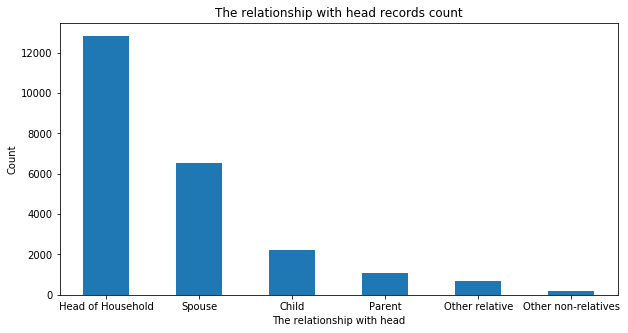

In [0]:
df['The relathip with head'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("The relationship with head")
plt.ylabel("Count")
plt.title("The relationship with head records count")
plt.show()

#### g) Marital status

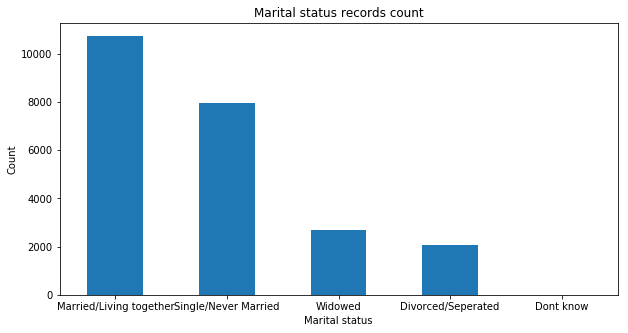

In [0]:
df['marital_status'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Marital status records count")
plt.show()

#### e) Level of Education

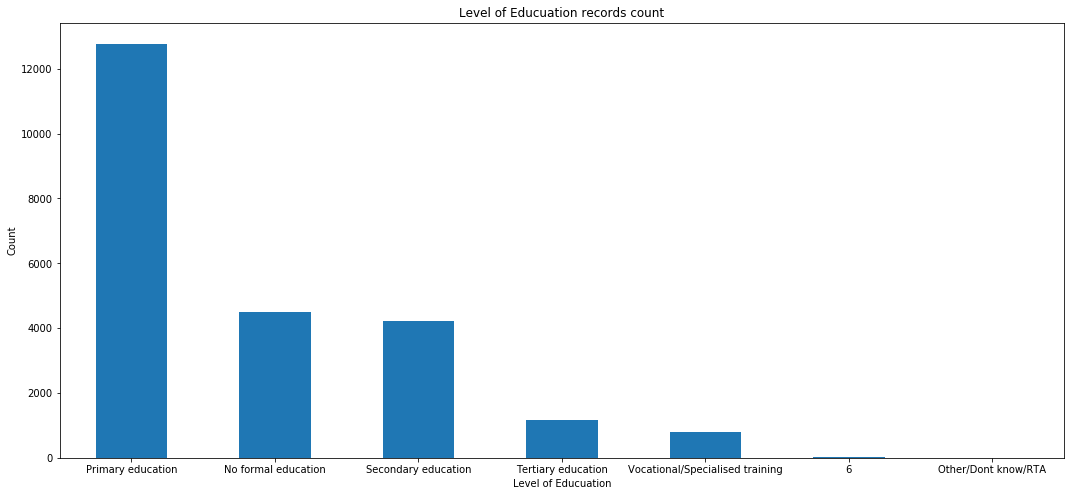

In [0]:
df['Level of Educuation'].value_counts().plot.bar(rot =0,figsize=(18,8))
plt.xlabel("Level of Educuation")
plt.ylabel("Count")
plt.title("Level of Educuation records count")
plt.show()

#### f) Type of Job

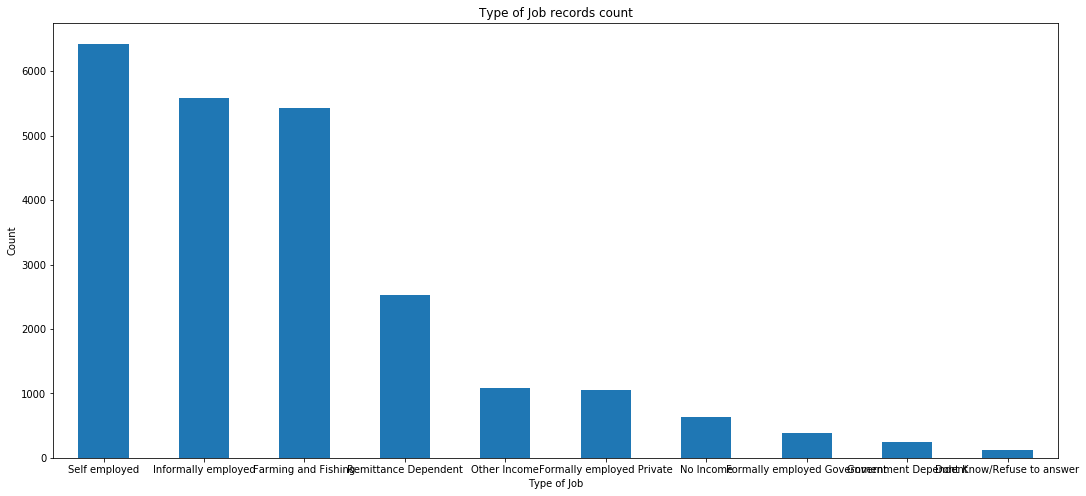

In [0]:
df['Type of Job'].value_counts().plot.bar(rot =0,figsize=(18,8))
plt.xlabel("Type of Job")
plt.ylabel("Count")
plt.title("Type of Job records count")
plt.show()

## 6. Exploratory Analysis

Bivariate Summary

Univariate Summary

### Data Reduction

Factor analysis

In [0]:
#Factor Analysis

Principal component analysis

In [0]:
#Principal component analysis calculation

Discriminant analysis

In [0]:
#Discriminant analysis calculation

## 7. Implementing the Solution

## 8. Challenging the solution

## 9. Follow up questions

